# Pair Programming Repaso Conceptos Resumidos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from pydataset import data
import matplotlib.pyplot as plt


In [3]:
df_uni = pd.read_csv('files/cwurData.csv', index_col = 0)
df_uni.head()

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,,,,,,,,,,,,,
1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Homogeneizamos nuestros datos

In [4]:
columnas_min = {col:col.lower().strip().replace(" ","_") for col in df_uni.columns}
df_uni.rename(columns = columnas_min, inplace=True)
df_uni.columns

Index(['institution', 'country', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'broad_impact', 'patents', 'score', 'year'],
      dtype='object')

Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:

## 1. Hacer una exploración inicial del dataframe.

- ¿Cuántas filas tiene?
- ¿Cuántas nulos tiene?
- ¿Y duplicados?
- ¿Qué tipo de datos tenemos en el dataframe?
- etc


In [5]:
print(f'Nuestro dataframe tiene {df_uni.shape[0]} filas y {df_uni.shape[1]} columnas')

Nuestro dataframe tiene 2200 filas y 13 columnas


In [6]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   institution           2200 non-null   object 
 1   country               2200 non-null   object 
 2   national_rank         2200 non-null   int64  
 3   quality_of_education  2200 non-null   int64  
 4   alumni_employment     2200 non-null   int64  
 5   quality_of_faculty    2200 non-null   int64  
 6   publications          2200 non-null   int64  
 7   influence             2200 non-null   int64  
 8   citations             2200 non-null   int64  
 9   broad_impact          2000 non-null   float64
 10  patents               2200 non-null   int64  
 11  score                 2200 non-null   float64
 12  year                  2200 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 240.6+ KB


- Miramos cuantos nulos tenemos por columna

In [7]:
df_uni.isnull().sum()

institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Son unos datos bastante buenos, hay 0 nulos, exceptuando la columna borad_impact, que tiene 200.

- Duplicados

In [8]:
df_uni.duplicated().sum()

0

No existen valores duplicados

- Tipo de datos

In [31]:
df_uni.dtypes
# También se puede ver con df_uni.dtypes df_uni.info()

institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

2 de nuestras columnas son categóricas, el resto númericas. 9 de estas son de tipo int64 y 2 son float64.

- Otras exploraciones

In [10]:
df_uni.describe().T

,count,mean,std,min,25%,50%,75%,max
national_rank,2200.0,40.278182,51.740870,1.00,6.00,21.0,49.000,229.0
quality_of_education,2200.0,275.100455,121.935100,1.00,175.75,355.0,367.000,367.0
alumni_employment,2200.0,357.116818,186.779252,1.00,175.75,450.5,478.000,567.0
quality_of_faculty,2200.0,178.888182,64.050885,1.00,175.75,210.0,218.000,218.0
publications,2200.0,459.908636,303.760352,1.00,175.75,450.5,725.000,1000.0
influence,2200.0,459.797727,303.331822,1.00,175.75,450.5,725.250,991.0
citations,2200.0,413.417273,264.366549,1.00,161.00,406.0,645.000,812.0
broad_impact,2000.0,496.699500,286.919755,1.00,250.50,496.0,741.000,1000.0
patents,2200.0,433.346364,273.996525,1.00,170.75,426.0,714.250,871.0
score,2200.0,47.798395,7.760806,43.36,44.46,45.1,47.545,100.0


In [11]:
df_uni.describe(include = 'object').T

,count,unique,top,freq
institution,2200,1024,Harvard University,4
country,2200,59,USA,573


In [12]:
print(f'Nuestro Dataframe tiene {df_uni.size} datos')

Nuestro Dataframe tiene 28600 datos


## 2. Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.


- 2.0. ¿Qué países están dentro del World University Ranking y cuál es el periodo de años que se recogen en el csv?
- 2.1. ¿Qué universidad tiene más publicaciones y cuál menos?
- 2.2. ¿Qué universidad por país tiene el ránking nacional (score) más alto?
- 2.3. ¿Qué país tiene de media el mejor ránking (score)?
- 2.4. ¿Existen outliers en el score?
- 2.5. ¿Tiene relación el ranking (score) y el número de estudiantes con empleo (rank for alumni employement)?
- 2.6. ¿Existe relación entre el ranking (score) y el número de patentes?

## 3. Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

A manera de introducción, es importante apuntar que los datos que presenta el dataframe corresponden al World University Rankings con información entre 2012 y 2015. Debemos partir del hehco de que los rankings universitarios tienen por objeto establecer un orden jerárquico de las instituciones de educación superior basándose en parámetros o variables que pretenden medir la calidad de la educación universitaria, de la investigación y otros aspectos de la actividad académica. En varios de los rankings de universidades más conocidos las variables tienen pesos relativo que se les asigna, ya que en la descripción del dataframe no se entrega esa información, supondremos que tienen un peso igual en el ranking cada una de las variables.

En este sentido, aquellas preguntas que apuntan a conocer la relación entre el 'score' y alguna de las variables busca evidenciar el peso de la variable en el cálculo del ranking o qué tipo de relación tienen.

#### 2.0. ¿Qué países están dentro del World University Ranking y cuál es el periodo de años que se recogen en el csv?

In [37]:
print (f"""Los siguietes datos corresponden a los años {df_uni['year'].unique()} , 
entre este período se consideró en el ranking a los siguientes países: 
{df_uni['country'].unique()}""")

Los siguietes datos corresponden a los años [2012 2013 2014 2015] , 
entre este período se consideró en el ranking a los siguientes países: 
['USA' 'United Kingdom' 'Japan' 'Switzerland' 'Israel' 'Canada' 'France'
 'Sweden' 'South Korea' 'Italy' 'Germany' 'Netherlands' 'Finland' 'Norway'
 'Australia' 'Denmark' 'Singapore' 'Russia' 'China' 'Taiwan' 'Belgium'
 'South Africa' 'Spain' 'Brazil' 'Hong Kong' 'Ireland' 'Austria'
 'New Zealand' 'Portugal' 'Thailand' 'Czech Republic' 'Malaysia' 'India'
 'Greece' 'Mexico' 'Hungary' 'Argentina' 'Turkey' 'Poland' 'Saudi Arabia'
 'Chile' 'Iceland' 'Slovenia' 'Estonia' 'Lebanon' 'Croatia' 'Colombia'
 'Slovak Republic' 'Iran' 'Egypt' 'Serbia' 'Bulgaria' 'Lithuania' 'Uganda'
 'United Arab Emirates' 'Uruguay' 'Cyprus' 'Romania' 'Puerto Rico']


#### 2.1. ¿Qué universidad tiene más publicaciones y cuál menos?

In [14]:
df_uni['publications'].max()

1000

In [15]:
df_uni[df_uni['publications'] == df_uni['publications'].max()]

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,,,,,,,,,,,,,
820,"National University of Ireland, Maynooth",Ireland,7,215,478,210,1000,716,800,800.0,552,44.49,2014
830,"University of Wales, Trinity Saint David",United Kingdom,62,367,567,218,1000,927,645,754.0,871,44.20,2015


Las dos universidades con más publicaciones son  National University of Ireland, de Irlanda y University of Wales, Trinity Saint David, de Reino Unido, con 1000 publicaciones.

In [16]:
df_uni[df_uni['publications'] == df_uni['publications'].min()]

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,,,,,,,,,,,,,
1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.0,2012
1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.0,2013
1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.0,2014
1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.0,2015


Hemos buscado también las universidades con menos publicaciones, pero no nos parecen datos concluyentes, puesto que se repite la institución.

#### 2.2. Qué universidad por país tiene el ránking nacional (score) más alto

In [17]:
df_uni_pais = df_uni.groupby(['country']).max().reset_index().sort_values('score', ascending= False)
df_uni_pais.head()

,country,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
54,USA,Yeshiva University,229,367,567,218,993,974,812,946.0,871,100.00,2015
57,United Kingdom,University of York,65,367,567,218,1000,927,812,906.0,871,97.64,2015
28,Japan,Yokohama National University,74,367,567,218,999,958,812,984.0,871,80.64,2015
50,Switzerland,University of Zurich,9,367,567,218,863,635,812,671.0,787,72.18,2015
26,Israel,Weizmann Institute of Science,7,367,567,218,587,479,812,690.0,552,66.76,2015


#### 2.3. Qué país tiene de media el mejor ránking (score)

In [18]:
df_paises = df_uni.groupby(['country'])['score'].mean().reset_index().sort_values('score', ascending= False)
df_paises.head()

,country,score
26,Israel,52.654091
54,USA,51.839860
50,Switzerland,51.208846
43,Singapore,50.160000
57,United Kingdom,49.474653


#### 2.4 Existen Outliers o universidades con score muy alto o muy bajo?


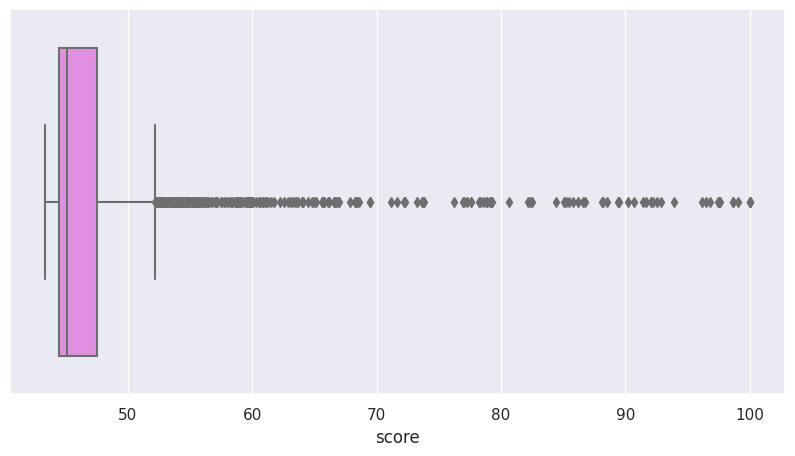

In [20]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")

# Creando el grafico de cajas
sns.boxplot(data = df_uni , x =  "score", color=  "violet");


Evidenciamos que hay varias universidades con puntuaciones fuera del Q3 y alejados de la media. Por lo que comprobamos si nuestros datos son robustos.

In [22]:
robus = 1/df_uni.shape[0]
robus

0.00045454545454545455

In [23]:
df_uni["score"].mean()

47.79839545454546

In [24]:
df_uni["score"].median()

45.1

El valor de la robustez muestra que la muestra es fuerte, lo que se debe a la amplitud de la muestra. Así mismo, la media y la media son valores parecidos, corrobora la robustez alta de los resultados de la muestra.

#### 2.5. ¿Tiene relación el ranking (score) y el número de estudiantes con empleo (rank for alumni employement)?

In [25]:
df_uni.columns

Index(['institution', 'country', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'broad_impact', 'patents', 'score', 'year'],
      dtype='object')

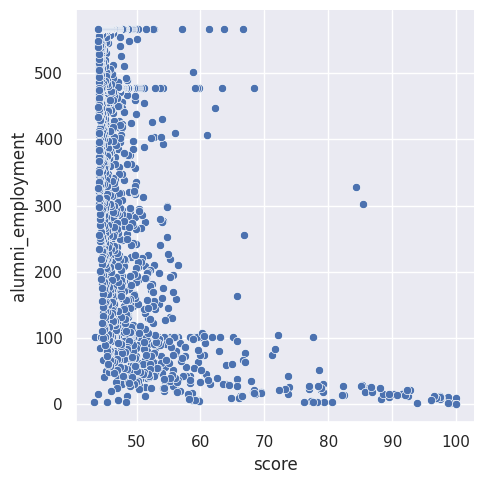

In [26]:
sns.relplot(x="score" , y= 'alumni_employment' , data = df_uni)

No hay correlación entre el ranking o puntaje total, ello significaría que no hay relación entre el ranking de la universidad en la que se gradúan y la obtención de empleo.

#### 2.6. ¿Tiene relación el ranking (score) y el número de patentes?

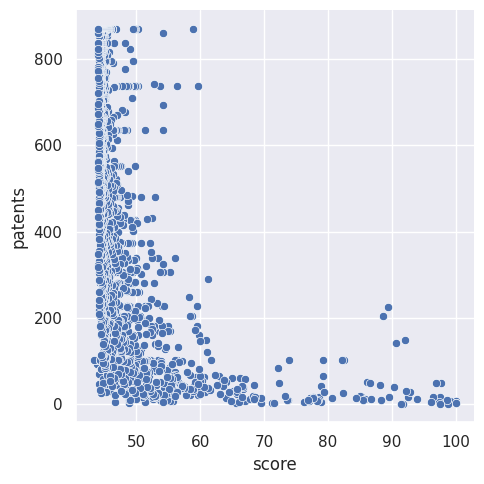

In [27]:
sns.relplot(x="score" , y= 'patents' , data = df_uni)

In [29]:
correlacion_uni = df_uni.corr()
correlacion_uni

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
national_rank,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.173043,0.159440,-0.199756,0.102951
quality_of_education,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.521615,0.528120,-0.600541,0.427732
alumni_employment,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.423619,0.528219,-0.510374,0.427710
quality_of_faculty,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.549345,0.555107,-0.693540,0.484788
publications,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.917878,0.671558,-0.522111,0.318245
influence,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.916040,0.611811,-0.522837,0.318298
citations,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.852638,0.598728,-0.522438,0.328771
broad_impact,0.173043,0.521615,0.423619,0.549345,0.917878,0.916040,0.852638,1.000000,0.562861,-0.531590,-0.000124
patents,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.562861,1.000000,-0.474810,0.368570
score,-0.199756,-0.600541,-0.510374,-0.693540,-0.522111,-0.522837,-0.522438,-0.531590,-0.474810,1.000000,-0.239136


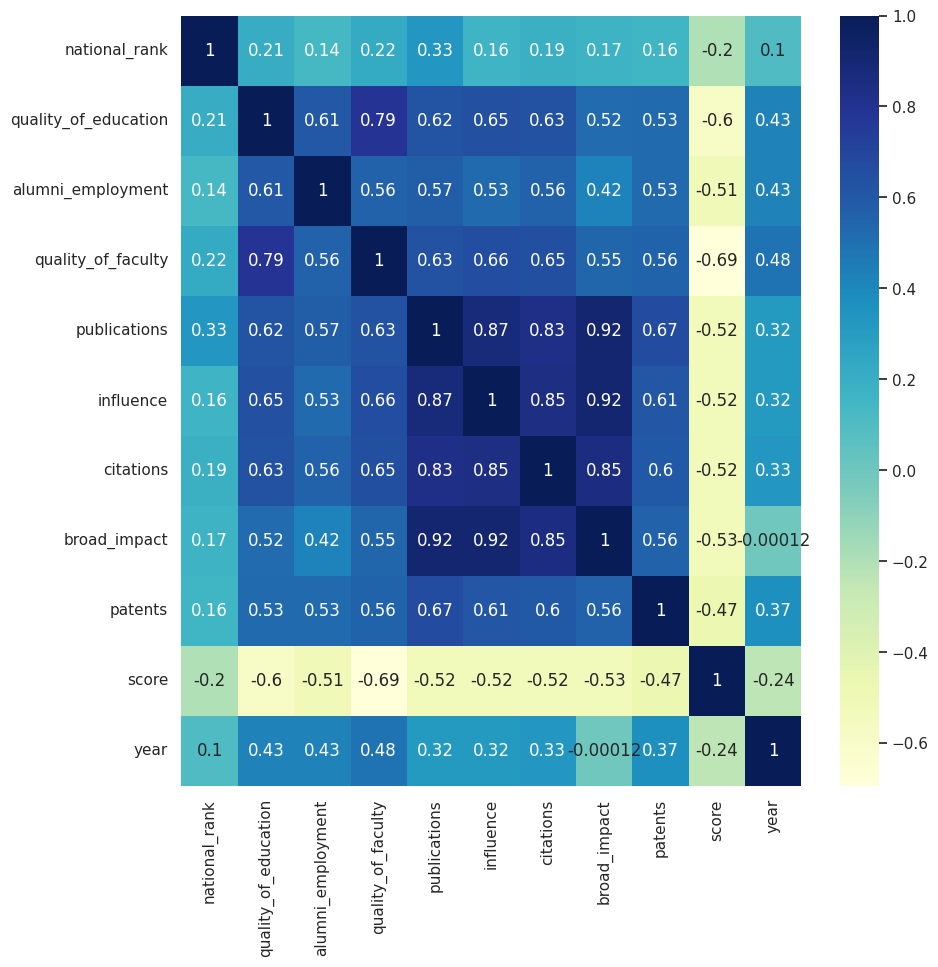

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(correlacion_uni,
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

Con esta gráfica se evidencia que las universidades que más publicaciones tienen son aquellas que tienen más influencia y ala vez aquellas con más influencia, han registrado un mayor número de patentes. Las publicaciones generan un mayor impacto en el extranjero para la universidad y este impacto está relacionado con una mayor influencia. 

La puntuación de la universidad o score tiene una correlación moderada negativa con la mayoría de variables y alta negativa con la variable quality of faculty. Esto sucede porque todo ranking implica una evaluación y por tanto debe existir relación, por tanto la variable score es una combinación de todas las variables.